# 1. Temporal Analysis of Groundwater Levels

### Objective: Understand how groundwater levels have changed over the years and months.

### Method:
1. Calculate yearly averages for each ward to identify long-term trends.
2. Calculate monthly averages across years to observe seasonal fluctuations.
3. Plot time-series graphs to visualize changes.

### Insights:
Identify declining trends that indicate over-extraction or weak recharge.
Detect seasonal patterns (e.g., post-monsoon recharge, pre-monsoon depletion).


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Load the dataset
file_path = "chennai-ground-water-levels-2023.csv"  # Replace with your file path
df = pd.read_csv(file_path)

In [12]:
df.head()

,S.No.,Area No.,Dept No.,Location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1.0,I,1.0,Kathivakkam,1.48,1.520,1.462,1.50,1.53,1.554,1.688,1.599,1.610,1.53,1.29,1.38
1,2.0,I,2.0,Kathivakkam,3.26,3.293,3.310,3.36,3.36,3.382,3.416,3.459,3.470,3.48,3.35,3.268
2,3.0,I,3.0,Ernavoor,2.01,2.236,2.244,2.24,2.14,2.166,2.231,2.51,2.264,2.24,1.82,1.91
3,4.0,I,4.0,Sadaiyankuppam,3.67,3.745,3.661,3.66,3.65,3.638,3.808,4.01,3.646,3.67,3.27,3.125
4,5.0,I,5.0,Kamadhenu Nagar,3.45,3.492,3.439,3.31,3.41,3.151,3.499,3.28,3.393,3.2,3.07,3.157


In [17]:
# Step 1: Data Preparation
# Ensure the data has columns: "Location", "Jan", "Feb", ..., "Dec"
monthly_columns = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [19]:
# Convert monthly columns to numeric, replacing non-numeric values with NaN
df[monthly_columns] = df[monthly_columns].apply(pd.to_numeric, errors='coerce')

# Step 2: Calculate Yearly Averages for Each Ward
df["Yearly Average"] = df[monthly_columns].mean(axis=1)

In [20]:
# Step 3: Calculate Monthly Averages Across All Wards
monthly_averages = df[monthly_columns].mean(axis=0)

C:\Users\rumma\AppData\Local\Temp\ipykernel_18480\896260781.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


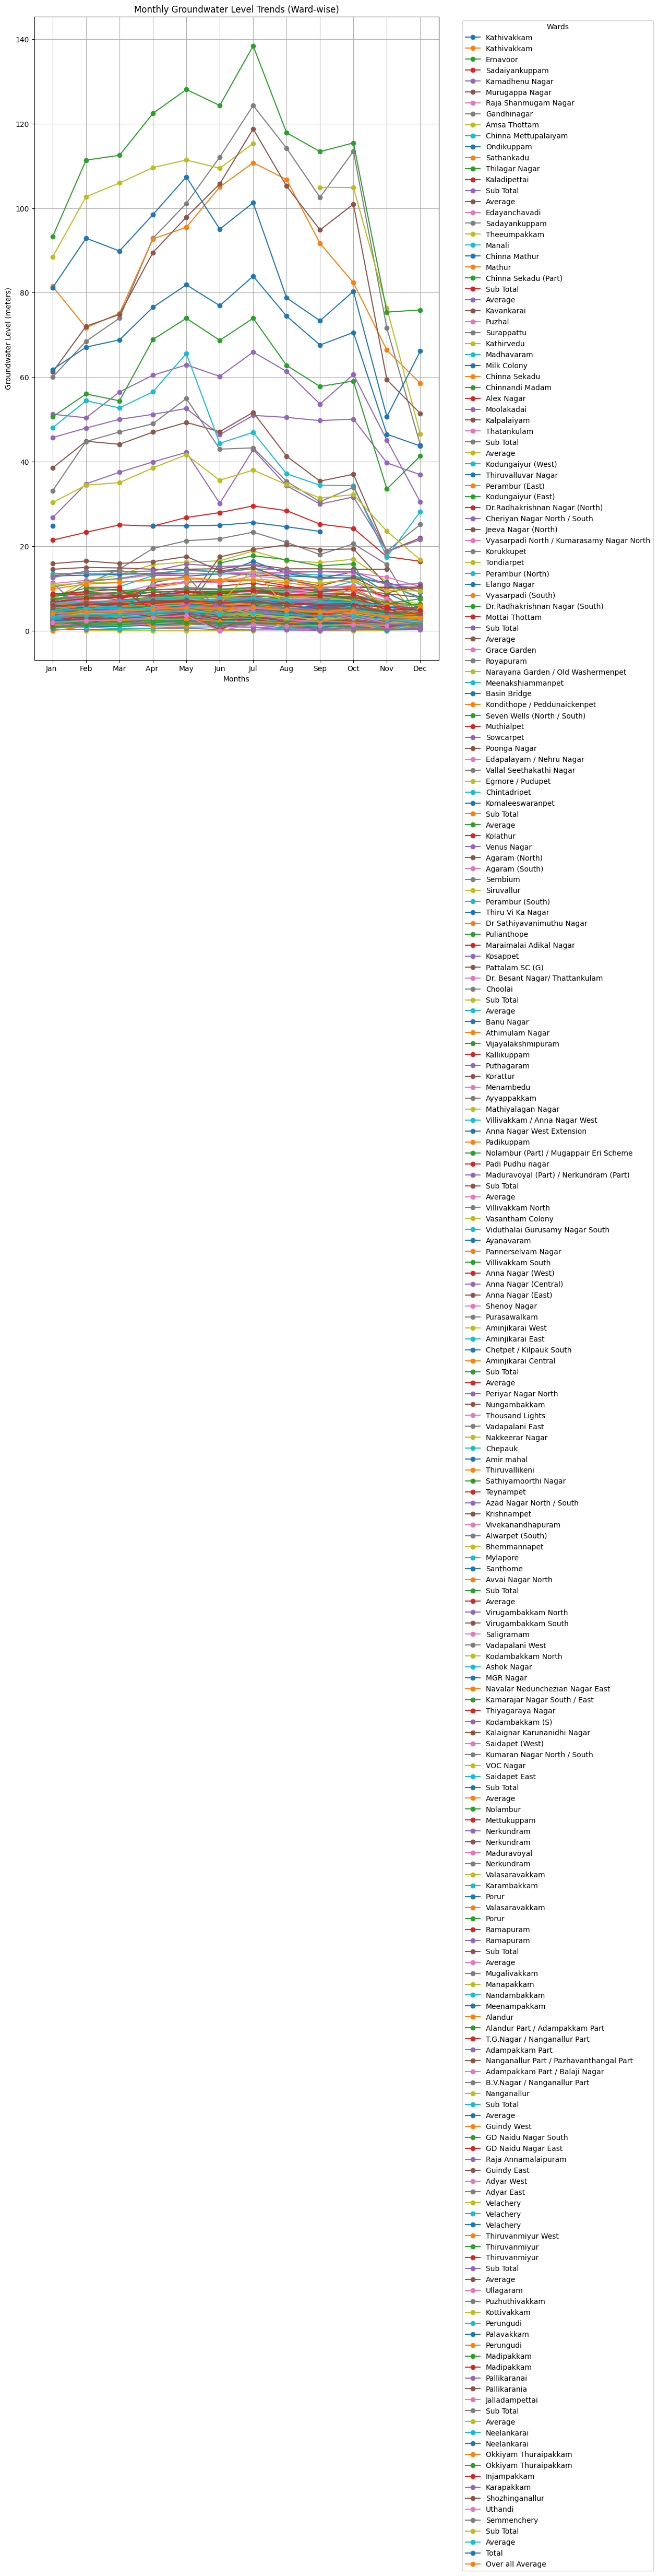

In [25]:
# Step 4: Visualize Yearly Trends for Each Ward
plt.figure(figsize=(10, 16))
for _, row in df.iterrows():
    ward_name = row["Location"]
    yearly_trend = row[monthly_columns]
    plt.plot(monthly_columns, yearly_trend, label=ward_name, marker='o')

plt.title("Monthly Groundwater Level Trends (Ward-wise)")
plt.xlabel("Months")
plt.ylabel("Groundwater Level (meters)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Wards")
plt.grid()
plt.tight_layout()
plt.show()

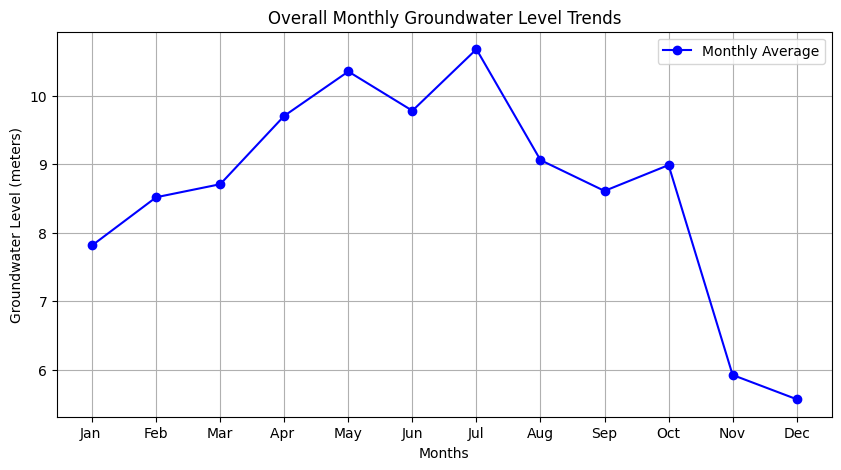

In [26]:
# Step 5: Visualize Overall Monthly Averages
plt.figure(figsize=(10, 5))
plt.plot(monthly_columns, monthly_averages, marker='o', color='b', label="Monthly Average")
plt.title("Overall Monthly Groundwater Level Trends")
plt.xlabel("Months")
plt.ylabel("Groundwater Level (meters)")
plt.grid()
plt.legend()
plt.show()

In [27]:
# Step 6: Display Key Insights
print("Yearly Averages Per Ward:")
print(df[["Location", "Yearly Average"]])

print("\nOverall Monthly Averages:")
print(monthly_averages)

Yearly Averages Per Ward:
             Location  Yearly Average
0         Kathivakkam        1.511917
1         Kathivakkam        3.367333
2            Ernavoor        2.167583
3      Sadaiyankuppam        3.629417
4     Kamadhenu Nagar        3.320917
..                ...             ...
227       Semmenchery        3.961333
228         Sub Total       32.677667
229           Average        3.675243
230             Total       68.321155
231  Over all Average        4.554744

[232 rows x 2 columns]

Overall Monthly Averages:
Jan      7.815062
Feb      8.517595
Mar      8.707943
Apr      9.705862
May     10.353571
Jun      9.780664
Jul     10.678627
Aug      9.060182
Sep      8.609781
Oct      8.987451
Nov      5.923075
Dec      5.568974
dtype: float64


## Explanation of Code

#### Data Loading:

Reads the CSV file containing groundwater data. Ensure it has Location and Jan to Dec columns.

#### Yearly Averages:

Calculates the average groundwater level across all months for each ward and stores it in a new column, Yearly Average.

#### Monthly Averages:

Computes the average groundwater level across all wards for each month.

#### Visualization:

Ward-wise Trends: Plots individual monthly trends for each ward to observe temporal changes.
Overall Monthly Averages: Plots monthly averages to visualize seasonal variations.

#### Insights:

Displays calculated yearly averages for wards and monthly averages across all wards.


## Output
#### Ward-wise Trends Plot:

A time-series graph showing monthly groundwater levels for each ward.
#### Overall Monthly Averages Plot:

A single line chart indicating average groundwater levels for each month across all wards.
#### Key Metrics:

Prints yearly averages per ward and overall monthly averages.